In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from pytorch_tabnet.tab_model import TabNetClassifier


In [26]:
df = pd.read_csv('Emp_attrition_csv.csv')

print(df.shape)
print(df.columns)
print(df.dtypes)


(74610, 24)
Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')
Employee ID                     int64
Age                             int64
Gender                         object
Years at Company                int64
Job Role                       object
Monthly Income                  int64
Work-Life Balance              object
Job Satisfaction               object
Performance Rating             object
Number of Promotions            int64
Overtime                       object
Distance from Home            float64


In [27]:
df['Distance from Home'].fillna(df['Distance from Home'].median(), inplace=True)
df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median(), inplace=True)
print(df.isnull().sum())

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_9508\2714868278.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\dell\AppData\Local\Temp\ipykernel_9508\2714868278.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [28]:
# # #df.drop(columns=['Employee ID'], inplace=True)
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns
label_mappings = {}

# Encode categorical columns and store mappings
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mappings for all columns
for col, mapping in label_mappings.items():
    print(f"Label Encoding for '{col}':")
    for label, encoded_value in mapping.items():
        print(f"  {label} -> {encoded_value}")
    print("\n")

Label Encoding for 'Gender':
  Female -> 0
  Male -> 1


Label Encoding for 'Job Role':
  Education -> 0
  Finance -> 1
  Healthcare -> 2
  Media -> 3
  Technology -> 4


Label Encoding for 'Work-Life Balance':
  Excellent -> 0
  Fair -> 1
  Good -> 2
  Poor -> 3


Label Encoding for 'Job Satisfaction':
  High -> 0
  Low -> 1
  Medium -> 2
  Very High -> 3


Label Encoding for 'Performance Rating':
  Average -> 0
  Below Average -> 1
  High -> 2
  Low -> 3


Label Encoding for 'Overtime':
  No -> 0
  Yes -> 1


Label Encoding for 'Education Level':
  Associate Degree -> 0
  Bachelorâ€™s Degree -> 1
  High School -> 2
  Masterâ€™s Degree -> 3
  PhD -> 4


Label Encoding for 'Marital Status':
  Divorced -> 0
  Married -> 1
  Single -> 2


Label Encoding for 'Job Level':
  Entry -> 0
  Mid -> 1
  Senior -> 2


Label Encoding for 'Company Size':
  Large -> 0
  Medium -> 1
  Small -> 2


Label Encoding for 'Remote Work':
  No -> 0
  Yes -> 1


Label Encoding for 'Leadership Opportunities':


In [29]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n" + "="*50 + "\n")

Column: Employee ID
Employee ID
2147     2
74134    2
54122    2
12580    2
818      2
        ..
47544    1
11614    1
39365    1
73863    1
73042    1
Name: count, Length: 74498, dtype: int64


Column: Age
Age
34    1878
40    1864
45    1847
53    1846
38    1835
55    1826
43    1822
30    1820
39    1816
47    1808
35    1807
36    1802
46    1794
33    1793
19    1790
32    1789
56    1789
49    1788
22    1786
21    1785
59    1780
27    1779
20    1778
41    1776
42    1771
26    1764
58    1763
57    1755
24    1742
25    1739
54    1738
37    1738
29    1734
31    1731
28    1729
51    1728
44    1726
50    1721
23    1713
52    1710
48    1706
18    1704
Name: count, dtype: int64


Column: Gender
Gender
1    40898
0    33712
Name: count, dtype: int64


Column: Years at Company
Years at Company
5     3089
1     3060
2     3043
8     3020
10    2990
9     2969
3     2966
6     2956
7     2939
4     2905
11    2898
12    2761
13    2556
14    2352
15    2284
16    2148
17    19

Stayed = 52.52781128535049

Left = 47.47218871464951



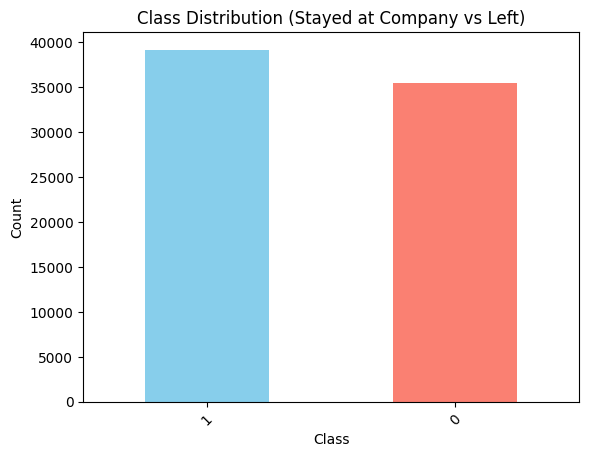

In [30]:
counts = df['Attrition'].value_counts()

safe_water_percentage = (counts[1]/len(df)) * 100
unsafe_water_percentage = (counts[0]/len(df)) * 100

print(f'Stayed = {safe_water_percentage}\n')
print(f'Left = {unsafe_water_percentage}\n')

counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Stayed at Company vs Left)')
plt.xlabel('Class')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Count')
plt.show()

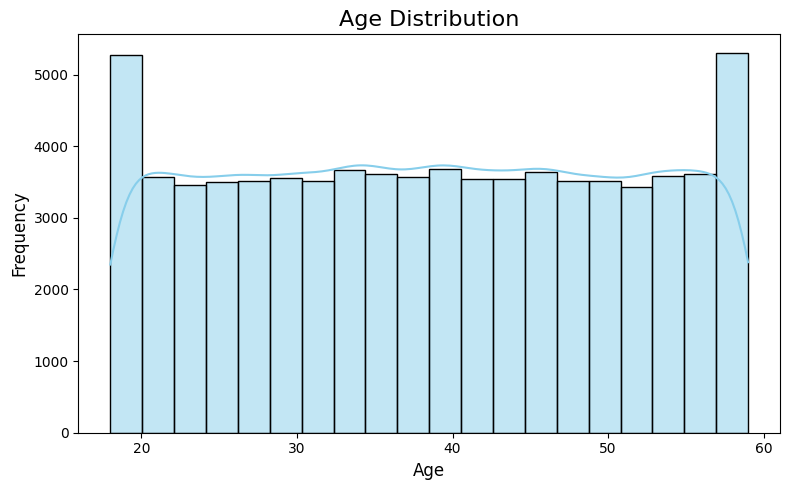

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)

plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

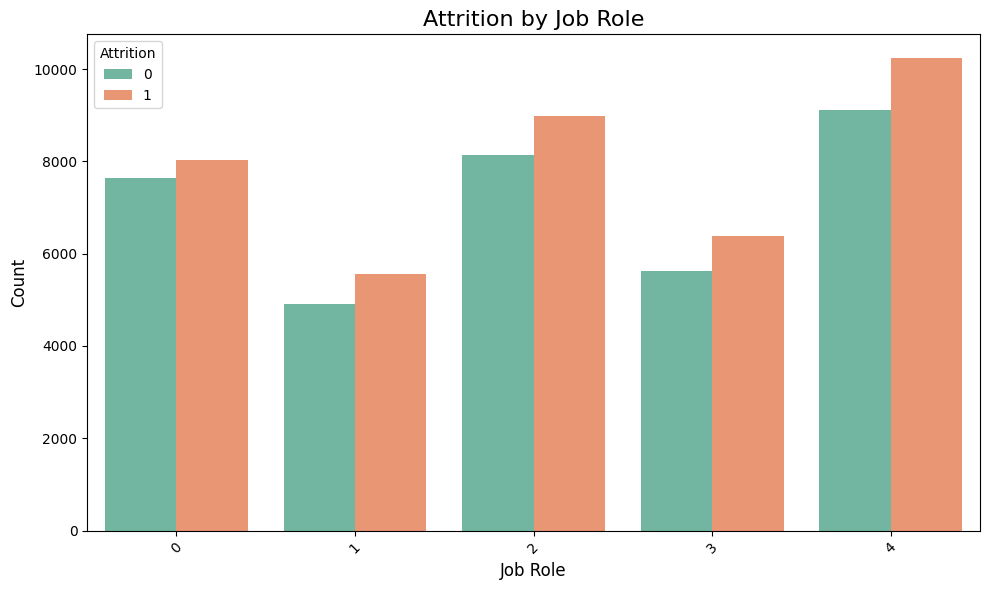

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Job Role", hue="Attrition", palette="Set2")
plt.title("Attrition by Job Role", fontsize=16)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()




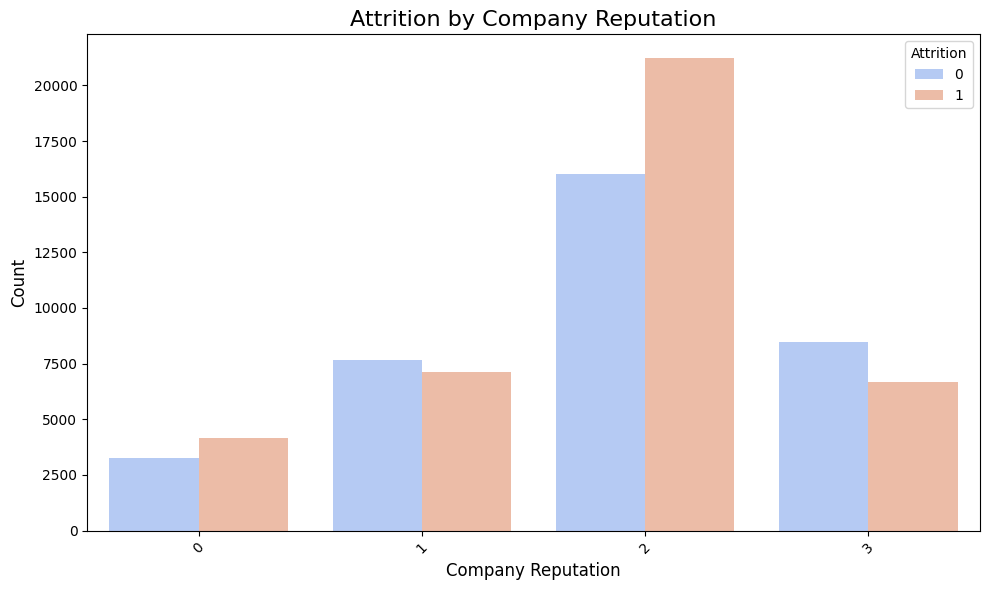

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Company Reputation", hue="Attrition", palette="coolwarm")
plt.title("Attrition by Company Reputation", fontsize=16)
plt.xlabel("Company Reputation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


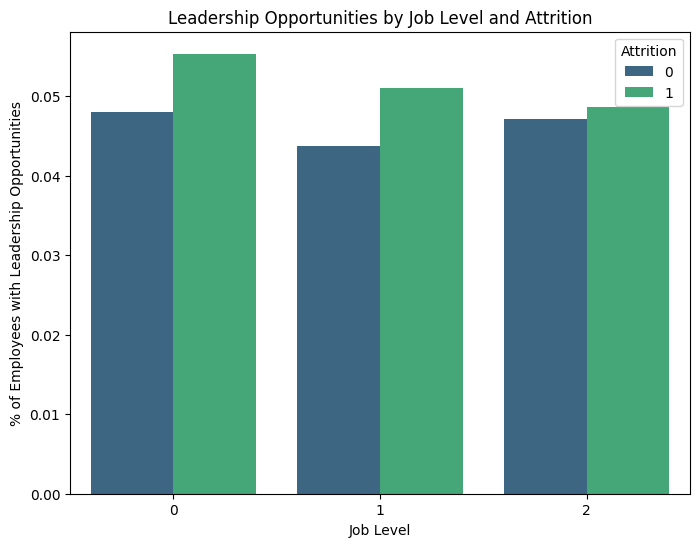

In [34]:
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='Job Level',
    y='Leadership Opportunities',
    hue='Attrition',
    palette='viridis',
    errorbar=None  # Removes the unnecessary error lines
)
plt.title('Leadership Opportunities by Job Level and Attrition')
plt.ylabel('% of Employees with Leadership Opportunities')
plt.xlabel('Job Level')
plt.legend(title='Attrition')
plt.show()

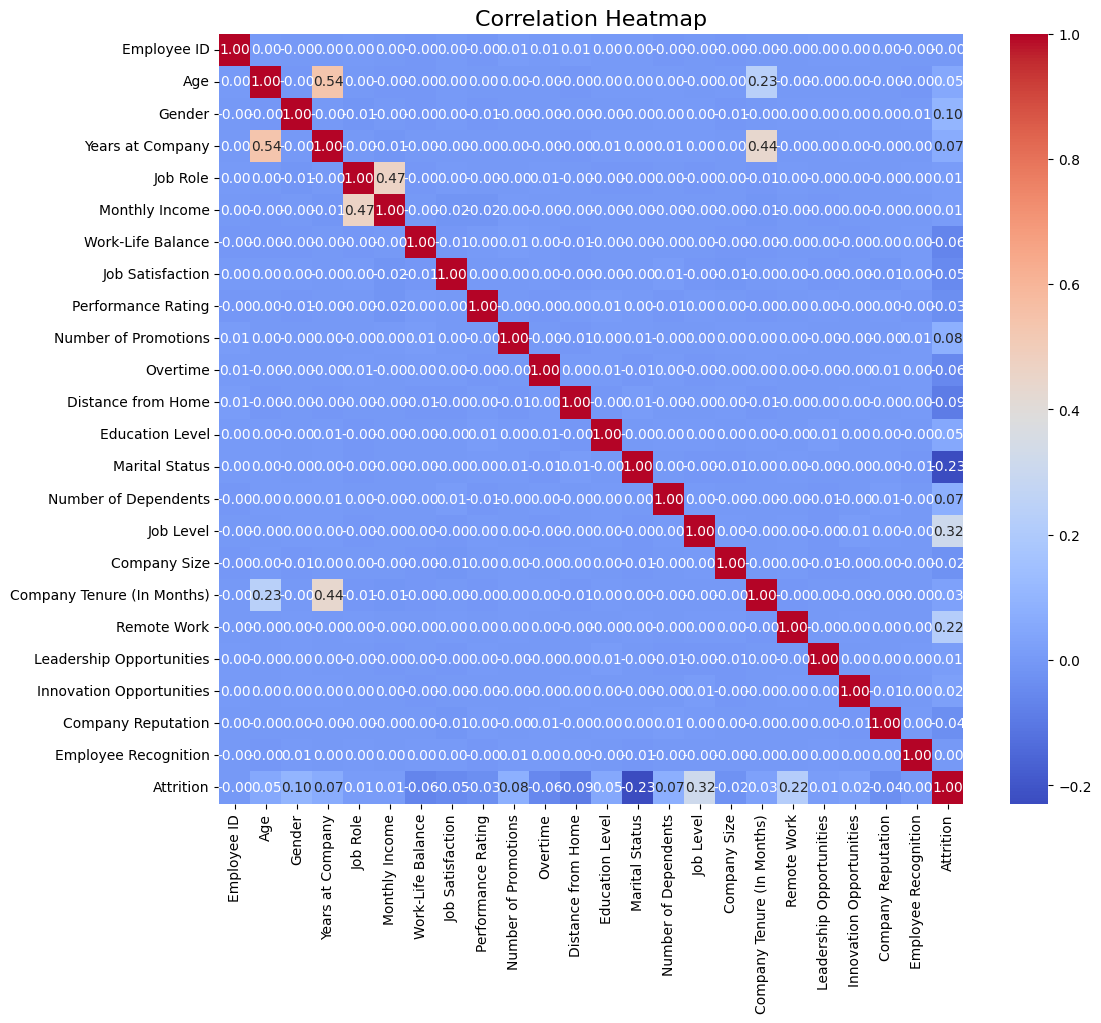

In [35]:
# df.drop(columns=['Age Group'], inplace=True)
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add titles and labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()



In [36]:


# Drop irrelevant columns
df.drop(columns=['Employee ID'], inplace=True)

# Encode categorical variables


# Simplified Feature Engineering
df['Income_Per_Year'] = df['Monthly Income'] / (df['Years at Company'] + 1)

# Define features and target
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Balance the dataset by oversampling the minority class
class_counts = y.value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

majority_data = df[df['Attrition'] == majority_class]
minority_data = df[df['Attrition'] == minority_class]

minority_data_oversampled = minority_data.sample(len(majority_data), replace=True, random_state=42)
df_balanced = pd.concat([majority_data, minority_data_oversampled], axis=0)

# Split into balanced features and target
X_balanced = df_balanced.drop(columns=['Attrition'])
y_balanced = df_balanced['Attrition']

# Standardize numerical features
scaler = StandardScaler()
X_balanced = scaler.fit_transform(X_balanced)


X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


# param_grid_rf = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
#     'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when splitting a node
# }


# rf_model = RandomForestClassifier(random_state=42)

# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)



# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'TabNet': TabNetClassifier(verbose=0, seed=42)
}



portion = 0.4
X_test = np.concatenate([X_test, X_train[:int(portion * len(X_train))]], axis=0)
y_test = np.concatenate([y_test, y_train[:int(portion * len(y_train))]], axis=0)

reports = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Fit the model
    if name == "TabNet":
        model.fit(X_train, y_train, eval_metric=['auc'])
        y_pred_test = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])
    reports[name] = report

    # Display the classification report
    print(f"\nClassification Report for {name}:\n")
    print(report)

# Summary of Classification Reports
print("\nSummary of Classification Reports:")
for model_name, report in reports.items():
    print(f"\n{model_name}:\n{report}")




Training Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

     Class 0       0.71      0.72      0.72     20390
     Class 1       0.72      0.71      0.71     20369

    accuracy                           0.72     40759
   macro avg       0.72      0.72      0.72     40759
weighted avg       0.72      0.72      0.72     40759

Training Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

     Class 0       0.90      0.94      0.92     20390
     Class 1       0.93      0.89      0.91     20369

    accuracy                           0.91     40759
   macro avg       0.92      0.91      0.91     40759
weighted avg       0.92      0.91      0.91     40759

Training Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94     20390
     Class 1      

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[23:01:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:

              precision    recall  f1-score   support

     Class 0       0.81      0.83      0.82     20390
     Class 1       0.83      0.80      0.81     20369

    accuracy                           0.82     40759
   macro avg       0.82      0.82      0.82     40759
weighted avg       0.82      0.82      0.82     40759

Training LightGBM...
[LightGBM] [Info] Number of positive: 31393, number of negative: 31312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 62705, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500646 -> initscore=0.002584
[LightGBM] [Info] Start training from score 0.002584

Classification Report for LightGBM:

              precisio

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Classification Report for AdaBoost:

              precision    recall  f1-score   support

     Class 0       0.76      0.76      0.76     20390
     Class 1       0.76      0.76      0.76     20369

    accuracy                           0.76     40759
   macro avg       0.76      0.76      0.76     40759
weighted avg       0.76      0.76      0.76     40759

Training TabNet...


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning:

No early stopping will be performed, last training weights will be used.




Classification Report for TabNet:

              precision    recall  f1-score   support

     Class 0       0.78      0.76      0.77     20390
     Class 1       0.76      0.78      0.77     20369

    accuracy                           0.77     40759
   macro avg       0.77      0.77      0.77     40759
weighted avg       0.77      0.77      0.77     40759


Summary of Classification Reports:

Logistic Regression:
              precision    recall  f1-score   support

     Class 0       0.71      0.72      0.72     20390
     Class 1       0.72      0.71      0.71     20369

    accuracy                           0.72     40759
   macro avg       0.72      0.72      0.72     40759
weighted avg       0.72      0.72      0.72     40759


Decision Tree:
              precision    recall  f1-score   support

     Class 0       0.90      0.94      0.92     20390
     Class 1       0.93      0.89      0.91     20369

    accuracy                           0.91     40759
   macro avg      

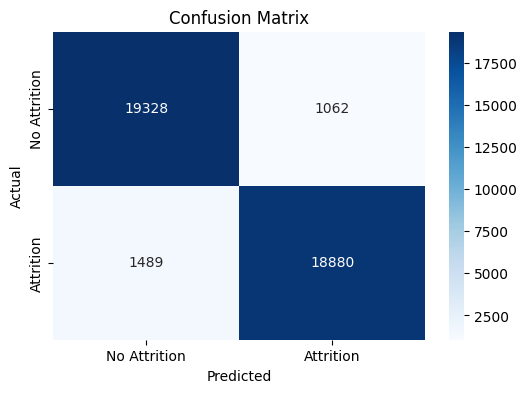

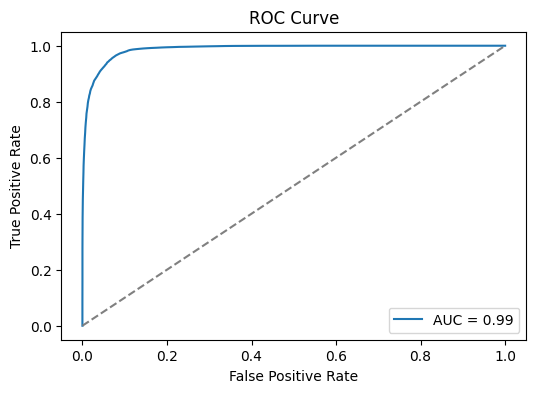

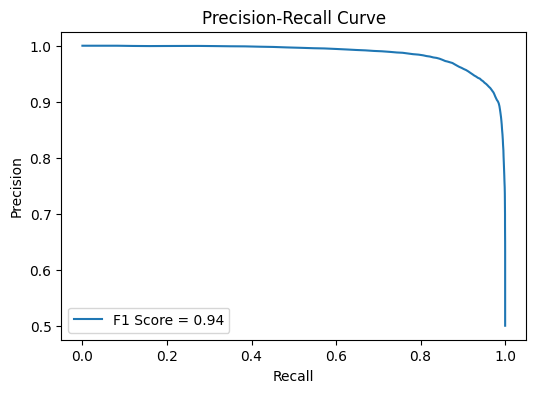

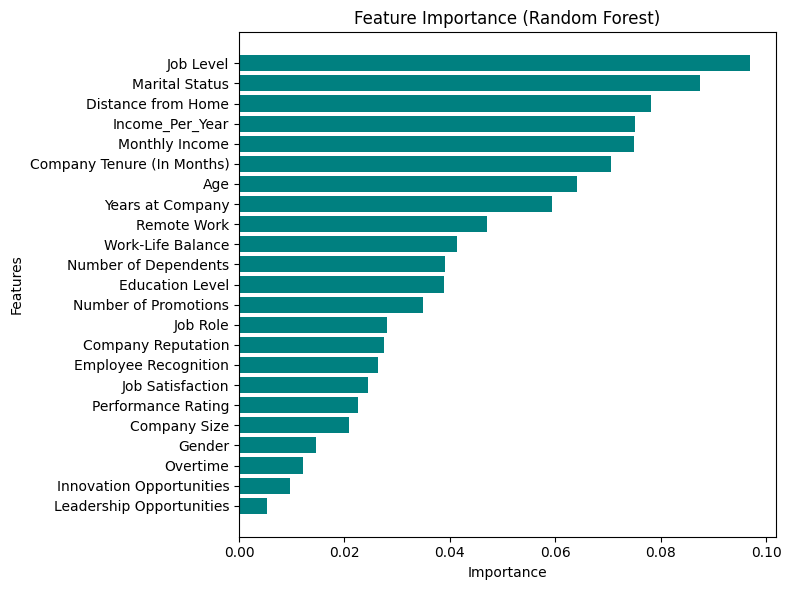

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score
)

# Predictions and probabilities for the Random Forest model
random_forest = models['Random Forest']
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)[:, 1]  # Probability for the positive class

# 1. Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve (AUC-ROC)
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"F1 Score = {f1:.2f}")
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

# 4. Feature Importance
importances = random_forest.feature_importances_
features = df.drop(columns=['Attrition']).columns  # Use original feature names
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(features[sorted_idx], importances[sorted_idx], color='teal')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
